# Cars Data Exploration
Review the cars dataset

In [1]:
# import project libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction import FeatureHasher
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, IsolationForest
import re

### Collect data 
Read csv file to collect cars data and filter relevant features

In [2]:
# Read CSV file
cars_df = pd.read_csv(r'C:\Users\cesar_0qb0xal\Documents\GitHub\cars_ml_project\data\data_exploration\input\cars.csv')
cars_df

,Unnamed: 0,msrp,year,canonical_mmty,model,local_zone,interior_color,aff_code,price,price_badge,...,mileage,make,bodystyle,cat,vin,canonical_mmt,fuel_type,stock_type,exterior_color,page_channel
0,0,57215.0,2024,Chevrolet:Blazer EV:RS:2024,Blazer EV,NaN,Black,national,54595.0,NaN,...,0.0,Chevrolet,SUV,ev_crossover_midsize,3GNKDCRJ6RS227894,Chevrolet:Blazer EV:RS,Electric,New,Sterling Gray Metallic,shopping
1,1,58845.0,2024,RAM:ProMaster 2500:High Roof:2024,ProMaster 2500,NaN,Black,national,52446.0,NaN,...,0.0,RAM,Cargo Van,van_fullsize,3C6LRVDG0RE118763,RAM:ProMaster 2500:High Roof,Gasoline,New,Bright White Clearcoat,shopping
2,2,58795.0,2024,Mercedes-Benz:Sprinter 2500:High Roof:2024,Sprinter 2500,NaN,NaN,national,54295.0,NaN,...,8.0,Mercedes-Benz,Cargo Van,van_fullsize,W1Y4KCHY8RT178723,Mercedes-Benz:Sprinter 2500:High Roof,Diesel,New,Blue Grey,shopping
3,3,33815.0,2024,Honda:CR-V:EX:2024,CR-V,NaN,Gray,national,NaN,NaN,...,7.0,Honda,SUV,crossover_compact,5J6RS3H44RL004214,Honda:CR-V:EX,Gasoline,New,Radiant Red Metallic,shopping
4,4,27995.0,2024,Chevrolet:Equinox:LS:2024,Equinox,NaN,Medium Ash Gray,national,24803.0,NaN,...,0.0,Chevrolet,SUV,crossover_midsize,3GNAXHEG1RL299011,Chevrolet:Equinox:LS,Gasoline,New,Summit White,shopping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91641,91641,57135.0,2024,RAM:1500:Tradesman:2024,1500,NaN,Black,national,48135.0,NaN,...,14.0,RAM,Pickup Truck,truck_fullsize,1C6SRFGTXRN165708,RAM:1500:Tradesman,Gasoline,New,Billet Silver Metallic Clearcoat,shopping
91642,91642,0.0,2010,Volkswagen:Eos:Komfort:2010,Eos,NaN,Titan Black,national,11950.0,NaN,...,86868.0,Volkswagen,Convertible,coupeconvertible_convertible,WVWBA7AH7AV014923,Volkswagen:Eos:Komfort,Gasoline,Used,Reflex Silver Metallic,shopping
91643,91643,83695.0,2024,RAM:1500:Longhorn:2024,1500,NaN,Mountain Brown,national,73195.0,NaN,...,15.0,RAM,Pickup Truck,truck_fullsize,1C6SRFKT9RN212671,RAM:1500:Longhorn,Gasoline,New,Diamond Black Crystal Pearlcoat,shopping
91644,91644,75280.0,2024,Chevrolet:Suburban:LT:2024,Suburban,NaN,Black,national,71122.0,NaN,...,3.0,Chevrolet,SUV,suv_fullsize,1GNSKCKD4RR151802,Chevrolet:Suburban:LT,Gasoline,New,Black,shopping


In [3]:
# Filter relevant features
columns_to_drop = ['page_channel', 'canonical_mmt', 'vin', 'dealer_zip', 'dealer_name', 'trim', 'aff_code', 'canonical_mmty', 'Unnamed: 0', 'local_zone', 'price_badge']
cars_df.drop(columns=columns_to_drop, inplace=True)
cars_df

,msrp,year,model,interior_color,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,stock_type,exterior_color
0,57215.0,2024,Blazer EV,Black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,Sterling Gray Metallic
1,58845.0,2024,ProMaster 2500,Black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,Bright White Clearcoat
2,58795.0,2024,Sprinter 2500,NaN,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,Blue Grey
3,33815.0,2024,CR-V,Gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,Gasoline,New,Radiant Red Metallic
4,27995.0,2024,Equinox,Medium Ash Gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,Summit White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91641,57135.0,2024,1500,Black,48135.0,Four-wheel Drive,14.0,RAM,Pickup Truck,truck_fullsize,Gasoline,New,Billet Silver Metallic Clearcoat
91642,0.0,2010,Eos,Titan Black,11950.0,Front-wheel Drive,86868.0,Volkswagen,Convertible,coupeconvertible_convertible,Gasoline,Used,Reflex Silver Metallic
91643,83695.0,2024,1500,Mountain Brown,73195.0,Four-wheel Drive,15.0,RAM,Pickup Truck,truck_fullsize,Gasoline,New,Diamond Black Crystal Pearlcoat
91644,75280.0,2024,Suburban,Black,71122.0,Four-wheel Drive,3.0,Chevrolet,SUV,suv_fullsize,Gasoline,New,Black


In [4]:
# Print the dataset shape
cars_df.shape

(91646, 13)

### Clean Data
Remove duplicates in dataset

In [5]:
# Remove duplicates
cars_df.drop_duplicates(inplace=True)
cars_df.shape

(44878, 13)

### Apply Features transformation

#### msrp
manufacturer's suggested retail price. Replace 0 values by NaN, 0 is not a valid price.

In [6]:
# Apply msrp value
def map_msrp(msrp):
    """
    Replace 0 values by null

    :param msrp: manufacturer's suggested retail price
    """
    if msrp == 0:
        return np.nan
    return msrp

In [7]:
# Apply msrp transformation
cars_df['msrp'] = cars_df['msrp'].map(map_msrp)

In [8]:
cars_df['msrp'].skew()

2.5763331680258106

In [9]:
# Check min value
cars_df['msrp'].min()

5895.0

In [10]:
# Check max value
cars_df['msrp'].max()

329486.0

<Axes: >

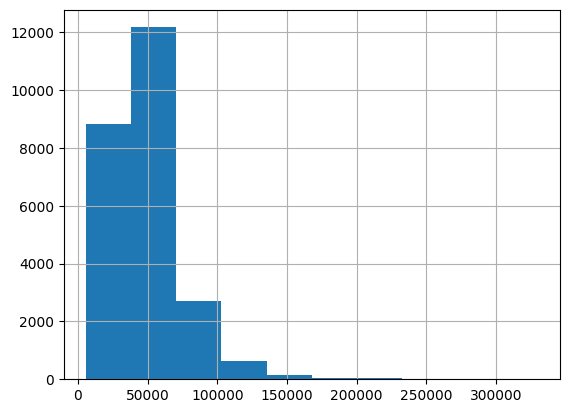

In [11]:
# plot hist
cars_df['msrp'].hist()

#### year
No transformation needed

<Axes: >

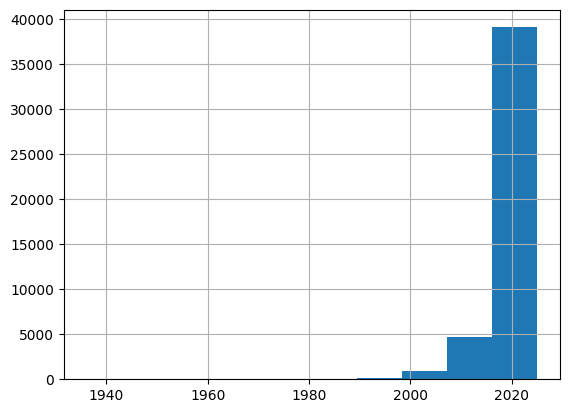

In [12]:
cars_df['year'].hist()

In [13]:
# Check the skew.
# Skew measures the asymmetry of the distribution relative to the normal distribution
cars_df['year'].skew()

-3.7751168456384803

In [14]:
# Check the kurtosis
# Kurtosis describes the height and sharpness of the central peak, relative to that of a standard bell curve
cars_df['year'].kurtosis()

26.07437496827761

In [15]:
cars_df['year'].min()

1936

A transformation is needed to handle the high negative skew and kurtosis, The current values represent the presence of outliers

#### model
Cars model, it's related with the maker

In [16]:
cars_df['model'].value_counts(dropna=False)

model
Escape                  787
Grand Cherokee          741
Outback                 735
Equinox                 724
Tucson                  683
                       ... 
ALPINA B8 Gran Coupe      1
Bentayga EWB              1
Aventador SVJ             1
IONIQ 5 N                 1
512 TR                    1
Name: count, Length: 1042, dtype: int64

In [17]:
# Review unique values
len(cars_df['model'].unique())

1042

Apply hash trick to handle the high-cardinality feature.

In [18]:
# Transform the categorical column into a format suitable for FeatureHasher
model_data = cars_df['model'].apply(lambda x: {x: 1}).tolist()

In [19]:
# Define the number of hash space
# By default it's the total number of unique options divided by 5. Check the 'Machine Learning Design patterns' book chapter 1
n_hash = int(len(cars_df['model'].unique())/20) # This values is a hyperparameter
n_hash

52

In [20]:
# Initialize FeatureHasher
hasher = FeatureHasher(n_features=n_hash, input_type='dict')
# Apply FeatureHasher
model_hashed_features = hasher.transform(model_data)
model_hashed_features.shape

(44878, 52)

In [21]:
# Generate model hashed dataframe
model_hashed_df = pd.DataFrame(model_hashed_features.toarray(), columns=[f'model_hashed_{i}' for i in range(model_hashed_features.shape[1])], index=cars_df.index)
model_hashed_df

,model_hashed_0,model_hashed_1,model_hashed_2,model_hashed_3,model_hashed_4,model_hashed_5,model_hashed_6,model_hashed_7,model_hashed_8,model_hashed_9,...,model_hashed_42,model_hashed_43,model_hashed_44,model_hashed_45,model_hashed_46,model_hashed_47,model_hashed_48,model_hashed_49,model_hashed_50,model_hashed_51
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
91641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Concatenate the dataframes
cars_df = pd.concat([cars_df, model_hashed_df], axis=1)
cars_df

,msrp,year,model,interior_color,price,drivetrain,mileage,make,bodystyle,cat,...,model_hashed_42,model_hashed_43,model_hashed_44,model_hashed_45,model_hashed_46,model_hashed_47,model_hashed_48,model_hashed_49,model_hashed_50,model_hashed_51
0,57215.0,2024,Blazer EV,Black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58845.0,2024,ProMaster 2500,Black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58795.0,2024,Sprinter 2500,NaN,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33815.0,2024,CR-V,Gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27995.0,2024,Equinox,Medium Ash Gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91636,36669.0,2024,Crosstrek,Black,36669.0,All-wheel Drive,6.0,Subaru,SUV,crossover_compact,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91637,51443.0,2024,Atlas Cross Sport,Mauro Brown,47013.0,All-wheel Drive,7.0,Volkswagen,SUV,suv_midsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91638,NaN,2022,Wagoneer,Global Black,49991.0,Four-wheel Drive,17815.0,Jeep,SUV,suv_midsize,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
91641,57135.0,2024,1500,Black,48135.0,Four-wheel Drive,14.0,RAM,Pickup Truck,truck_fullsize,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Once used drop the model feature
cars_df.drop(columns='model', inplace=True)
cars_df.shape

(44878, 64)

#### exterior_color
The feature has not consistensy. Vocabulary is open. Use and embedding method and clustering method to group them. Like TF-IDF or Word2Vec, and KMeans to group them or let them directly in a vector format.

NOTE: Using neural networks it's possile to improve the performance using an Embedding layer

In [24]:
cars_df['exterior_color'].value_counts(dropna=False)

exterior_color
Black                     2675
White                     1474
Gray                      1089
Summit White              1064
Bright White Clearcoat    1046
                          ... 
Osmium Grey Metallic         1
Firecracker Red              1
Matte Black                  1
Candy Apple Red              1
Fathom Blue Poly             1
Name: count, Length: 2585, dtype: int64

In [25]:
# Check unique values
len(cars_df['exterior_color'].unique())

2585

Apply lower case and remove special characters to help the vector model

In [26]:
def clean_exterior_color(exterior_color):
    # Check if value is empty
    if pd.isna(exterior_color):
        return 'unknown'
    # Convert interior_color to lower case
    exterior_color = exterior_color.lower()
    # Remove special characters
    exterior_color = re.sub(r'[\W_+w/\/]', ' ', exterior_color)
    # Remove double spaces
    exterior_color = re.sub(r'\s+', ' ', exterior_color)
    # Apply trim 
    exterior_color = exterior_color.strip()
    # Return formated text
    return exterior_color

In [27]:
# Apply lower case and remove special characters
cars_df['exterior_color'] = cars_df['exterior_color'].apply(clean_exterior_color)

In [28]:
cars_df['exterior_color'].value_counts(dropna=False)

exterior_color
black                    2735
hite                     1547
gray                     1132
summit hite              1064
bright hite clearcoat    1046
                         ... 
blu sebring metallic        1
launch green                1
shelter green               1
magnetic metal              1
fathom blue poly            1
Name: count, Length: 2498, dtype: int64

In [29]:
# Tokenize colors sentences
tokenized_exterior_color = [simple_preprocess(sentence) for sentence in cars_df['exterior_color'].tolist()]

In [30]:
# Train the Word2Vec model
exterior_color_vector_size = 5 # This is a hyperparameter. #D to keep it user friendly
exterior_color_model = Word2Vec(sentences=tokenized_exterior_color, vector_size=exterior_color_vector_size, window=5, min_count=1, workers=4)

In [31]:
# Calculate the vectors feature avegare
def get_interior_color_phrase_vector(exterior_color_phrase, model):
    exterior_color_words = exterior_color_phrase.split()
    exterior_color_word_vectors = [model.wv[word] for word in exterior_color_words if word in model.wv]
    if not exterior_color_word_vectors:
        print(f"No words found in model for phrase: {exterior_color_phrase}")
        return np.nan
    return sum(exterior_color_word_vectors) / len(exterior_color_word_vectors)


In [32]:
# Calculate the vertor for each interior color
exterior_color_vectors_s = cars_df['exterior_color'].apply(lambda ic: get_interior_color_phrase_vector(ic, exterior_color_model))
exterior_color_vectors_s

No words found in model for phrase: 9561002 9561002
No words found in model for phrase: gb0
No words found in model for phrase: 0085
No words found in model for phrase: 9561002 9561002
No words found in model for phrase: bb2
No words found in model for phrase: 08x5
No words found in model for phrase: silverskymetalli
No words found in model for phrase: 01f7
No words found in model for phrase: 08x8
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: ay2
No words found in model for phrase: 2tredblkroof
No words found in model for phrase: 2tredblkroof
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: 2tredblkroof
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: 2tredblkroof
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: 2tblublkroof
No words found in model for phrase: 0223
No words found in model for phrase: l
No words found in model for phrase: 582

0        [-1.0167432, 0.07972338, 0.95797443, -0.333533...
1        [0.45173904, 1.3379751, -0.25752586, 0.6487338...
2        [0.141299, 0.6650121, 0.8840486, -1.4572661, -...
3        [-0.83831793, 0.898115, -0.10260228, -0.959784...
4        [1.2568517, 0.71064556, 0.23757178, 0.141691, ...
                               ...                        
91636    [0.49213147, 0.86172813, 0.7315547, -0.5391164...
91637    [-0.43399867, 0.108471155, 1.1292372, -0.24642...
91638    [-0.2774565, 0.27629566, 0.9204588, -0.0633677...
91641    [-1.5606294, 0.54798096, 0.7281404, -0.0120726...
91644    [-0.7511814, 1.5970526, 1.3001631, -0.06324717...
Name: exterior_color, Length: 44878, dtype: object

In [33]:
# Replace the nan values with an array of (0,0,0)
base_invalid_value = [0]*exterior_color_vector_size
exterior_color_vectors_s = exterior_color_vectors_s.apply(lambda x: x if isinstance(x, np.ndarray) else base_invalid_value)

In [34]:
# Generate the interior color df using the transformed feature vectors
exterior_color_df = pd.DataFrame(exterior_color_vectors_s.values.tolist(), columns=[f'exterior_color_x{i}' for i in range(len(exterior_color_vectors_s[0]))], index=cars_df.index)
exterior_color_df

,exterior_color_x0,exterior_color_x1,exterior_color_x2,exterior_color_x3,exterior_color_x4
0,-1.016743,0.079723,0.957974,-0.333534,-0.814538
1,0.451739,1.337975,-0.257526,0.648734,-2.244616
2,0.141299,0.665012,0.884049,-1.457266,-0.907583
3,-0.838318,0.898115,-0.102602,-0.959785,-1.668351
4,1.256852,0.710646,0.237572,0.141691,-1.756619
...,...,...,...,...,...
91636,0.492131,0.861728,0.731555,-0.539116,-0.660716
91637,-0.433999,0.108471,1.129237,-0.246424,-0.847668
91638,-0.277456,0.276296,0.920459,-0.063368,-1.298279
91641,-1.560629,0.547981,0.728140,-0.012073,-1.663149


In [35]:
# Concatenate the dataframes
cars_df = pd.concat([cars_df, exterior_color_df], axis=1)
cars_df

,msrp,year,interior_color,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,...,model_hashed_47,model_hashed_48,model_hashed_49,model_hashed_50,model_hashed_51,exterior_color_x0,exterior_color_x1,exterior_color_x2,exterior_color_x3,exterior_color_x4
0,57215.0,2024,Black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,...,0.0,0.0,0.0,0.0,0.0,-1.016743,0.079723,0.957974,-0.333534,-0.814538
1,58845.0,2024,Black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,...,0.0,0.0,0.0,0.0,0.0,0.451739,1.337975,-0.257526,0.648734,-2.244616
2,58795.0,2024,NaN,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,...,0.0,0.0,0.0,0.0,0.0,0.141299,0.665012,0.884049,-1.457266,-0.907583
3,33815.0,2024,Gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,Gasoline,...,0.0,0.0,0.0,0.0,0.0,-0.838318,0.898115,-0.102602,-0.959785,-1.668351
4,27995.0,2024,Medium Ash Gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,...,0.0,-1.0,0.0,0.0,0.0,1.256852,0.710646,0.237572,0.141691,-1.756619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91636,36669.0,2024,Black,36669.0,All-wheel Drive,6.0,Subaru,SUV,crossover_compact,Gasoline,...,0.0,0.0,0.0,0.0,0.0,0.492131,0.861728,0.731555,-0.539116,-0.660716
91637,51443.0,2024,Mauro Brown,47013.0,All-wheel Drive,7.0,Volkswagen,SUV,suv_midsize,Gasoline,...,0.0,0.0,0.0,0.0,0.0,-0.433999,0.108471,1.129237,-0.246424,-0.847668
91638,NaN,2022,Global Black,49991.0,Four-wheel Drive,17815.0,Jeep,SUV,suv_midsize,Gasoline,...,0.0,-1.0,0.0,0.0,0.0,-0.277456,0.276296,0.920459,-0.063368,-1.298279
91641,57135.0,2024,Black,48135.0,Four-wheel Drive,14.0,RAM,Pickup Truck,truck_fullsize,Gasoline,...,0.0,0.0,0.0,0.0,0.0,-1.560629,0.547981,0.728140,-0.012073,-1.663149


In [36]:
# NOTE: No longer needed 5D embedding space is used
"""import matplotlib.pyplot as plt

x = cars_df['exterior_color_x0'].values.tolist()
y = cars_df['exterior_color_x1'].values.tolist()
z = cars_df['exterior_color_x2'].values.tolist()
# Labels for each point
labels = cars_df['exterior_color'].values.tolist()"""

"import matplotlib.pyplot as plt\n\nx = cars_df['exterior_color_x0'].values.tolist()\ny = cars_df['exterior_color_x1'].values.tolist()\nz = cars_df['exterior_color_x2'].values.tolist()\n# Labels for each point\nlabels = cars_df['exterior_color'].values.tolist()"

In [37]:
# NOTE: No longer needed 5D embedding space is used

"""# Create a new figure
fig = plt.figure(figsize=(16, 16))

# Add an axes
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, color='b', marker='o')  # You can change the color and marker style

# Label each point
for i, txt in enumerate(labels):
    ax.text(x[i], y[i], z[i], txt, color='red', fontsize=8)  # You can change text color and properties

# Adding labels to the axes
ax.set_xlabel('exterior_color 0')
ax.set_ylabel('exterior_color 1')
ax.set_zlabel('exterior_color 2')

# Show plot
plt.show()"""

"# Create a new figure\nfig = plt.figure(figsize=(16, 16))\n\n# Add an axes\nax = fig.add_subplot(111, projection='3d')\n\n# Scatter plot\nax.scatter(x, y, z, color='b', marker='o')  # You can change the color and marker style\n\n# Label each point\nfor i, txt in enumerate(labels):\n    ax.text(x[i], y[i], z[i], txt, color='red', fontsize=8)  # You can change text color and properties\n\n# Adding labels to the axes\nax.set_xlabel('exterior_color 0')\nax.set_ylabel('exterior_color 1')\nax.set_zlabel('exterior_color 2')\n\n# Show plot\nplt.show()"

In [38]:
# Once used drop the exterior_color feature
cars_df.drop(columns='exterior_color', inplace=True)
cars_df.shape

(44878, 68)

#### interior_color
The feature has not consistensy. Vocabulary is open. Use and embedding method and clustering method to group them. Like TF-IDF or Word2Vec, and KMeans to group them or let them directly in a vector format.

NOTE: Using neural networks it's possile to improve the performance using an Embedding layer

In [39]:
cars_df['interior_color'].value_counts(dropna=False)

interior_color
Black                                    17051
Jet Black                                 3133
Gray                                      2898
Ebony                                     2544
NaN                                       2429
                                         ...  
Camel/Dark Green                             1
Ebony / Ebony Oxford                         1
Caraway/ Ebony                               1
Jet Black/Spice Red                          1
Brandy w/Very Dark Atmosphere Accents        1
Name: count, Length: 1501, dtype: int64

In [40]:
# Check unique values
len(cars_df['interior_color'].unique())

1501

Apply lower case and remove special characters to help the vector model

In [41]:
def clean_interior_color(interior_color):
    # Check if value is empty
    if pd.isna(interior_color):
        return 'unknown'
    # Convert interior_color to lower case
    interior_color = interior_color.lower()
    # Remove special characters
    interior_color = re.sub(r'[\W_+w/\/]', ' ', interior_color)
    # Remove double spaces
    interior_color = re.sub(r'\s+', ' ', interior_color)
    # Return formated text
    return interior_color

In [42]:
# Apply lower case and remove special characters
cars_df['interior_color'] = cars_df['interior_color'].apply(clean_interior_color)

In [43]:
cars_df['interior_color'].value_counts(dropna=False)

interior_color
black                                  17173
jet black                               3136
gray                                    2937
ebony                                   2546
unknown                                 2429
                                       ...  
black dove                                 1
medium slate grey                          1
taruma bro n                               1
alloy black                                1
brandy very dark atmosphere accents        1
Name: count, Length: 1369, dtype: int64

In [44]:
# Tokenize colors sentences
tokenized_interior_color = [simple_preprocess(sentence) for sentence in cars_df['interior_color'].tolist()]

In [45]:
# Train the Word2Vec model
interior_color_vector_size = 5 # This is a hyperparameter. #D to keep it user friendly
interior_color_model = Word2Vec(sentences=tokenized_interior_color, vector_size=interior_color_vector_size, window=5, min_count=1, workers=4)

In [46]:
# Calculate the vectors feature avegare
def get_interior_color_phrase_vector(interior_color_phrase, model):
    interior_color_words = interior_color_phrase.split()
    interior_color_word_vectors = [model.wv[word] for word in interior_color_words if word in model.wv]
    if not interior_color_word_vectors:
        print(f"No words found in model for phrase: {interior_color_phrase}")
        return np.nan
    return sum(interior_color_word_vectors) / len(interior_color_word_vectors)


In [47]:
# Calculate the vertor for each interior color
interior_color_vectors_s = cars_df['interior_color'].apply(lambda ic: get_interior_color_phrase_vector(ic, interior_color_model))
interior_color_vectors_s

No words found in model for phrase:  e
No words found in model for phrase:  e
No words found in model for phrase: p 
No words found in model for phrase: c 
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: d 
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: glx7
No words found in model for phrase: b6x7
No words found in model for phrase: 7b
No words found in model for phrase: 7b
No words found in model for phrase: 7b
No words found in model for phrase: glx7
No words found in model for phrase: alx7
No words found in model for phrase: a7x9
No words found in model for phrase: glx7
No words found in model for phrase: b6x7
No words found in model for phrase: d6x7
No words found in model for phrase: b6x7
No words found in model for phra

0        [-0.49426496, 0.38753486, 0.5897873, 0.3383189...
1        [-0.49426496, 0.38753486, 0.5897873, 0.3383189...
2        [0.14623532, 0.10140524, 0.13515386, 0.0152573...
3        [-0.7491715, 0.73581445, 1.2861211, -0.6721486...
4        [-0.6084758, 0.7282572, 0.91405696, -0.7876327...
                               ...                        
91636    [-0.49426496, 0.38753486, 0.5897873, 0.3383189...
91637    [-1.012676, 0.6870677, 0.47637728, -0.3517939,...
91638    [-0.35561335, 0.30293626, 0.15012841, 0.110641...
91641    [-0.49426496, 0.38753486, 0.5897873, 0.3383189...
91644    [-0.49426496, 0.38753486, 0.5897873, 0.3383189...
Name: interior_color, Length: 44878, dtype: object

In [48]:
# Replace the nan values with an array of (0,0,0)
base_invalid_value = [0]*interior_color_vector_size
interior_color_vectors_s = interior_color_vectors_s.apply(lambda x: x if isinstance(x, np.ndarray) else base_invalid_value)

In [49]:
# Generate the interior color df using the transformed feature vectors
interior_color_df = pd.DataFrame(interior_color_vectors_s.values.tolist(), columns=[f'interior_color_x{i}' for i in range(len(interior_color_vectors_s[0]))], index=cars_df.index)
interior_color_df

,interior_color_x0,interior_color_x1,interior_color_x2,interior_color_x3,interior_color_x4
0,-0.494265,0.387535,0.589787,0.338319,-0.498702
1,-0.494265,0.387535,0.589787,0.338319,-0.498702
2,0.146235,0.101405,0.135154,0.015257,0.127018
3,-0.749171,0.735814,1.286121,-0.672149,0.055999
4,-0.608476,0.728257,0.914057,-0.787633,0.176680
...,...,...,...,...,...
91636,-0.494265,0.387535,0.589787,0.338319,-0.498702
91637,-1.012676,0.687068,0.476377,-0.351794,0.587591
91638,-0.355613,0.302936,0.150128,0.110641,-0.217025
91641,-0.494265,0.387535,0.589787,0.338319,-0.498702


In [50]:
# Concatenate the dataframes
cars_df = pd.concat([cars_df, interior_color_df], axis=1)
cars_df

,msrp,year,interior_color,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,...,exterior_color_x0,exterior_color_x1,exterior_color_x2,exterior_color_x3,exterior_color_x4,interior_color_x0,interior_color_x1,interior_color_x2,interior_color_x3,interior_color_x4
0,57215.0,2024,black,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,...,-1.016743,0.079723,0.957974,-0.333534,-0.814538,-0.494265,0.387535,0.589787,0.338319,-0.498702
1,58845.0,2024,black,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,...,0.451739,1.337975,-0.257526,0.648734,-2.244616,-0.494265,0.387535,0.589787,0.338319,-0.498702
2,58795.0,2024,unknown,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,...,0.141299,0.665012,0.884049,-1.457266,-0.907583,0.146235,0.101405,0.135154,0.015257,0.127018
3,33815.0,2024,gray,NaN,Front-wheel Drive,7.0,Honda,SUV,crossover_compact,Gasoline,...,-0.838318,0.898115,-0.102602,-0.959785,-1.668351,-0.749171,0.735814,1.286121,-0.672149,0.055999
4,27995.0,2024,medium ash gray,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,...,1.256852,0.710646,0.237572,0.141691,-1.756619,-0.608476,0.728257,0.914057,-0.787633,0.176680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91636,36669.0,2024,black,36669.0,All-wheel Drive,6.0,Subaru,SUV,crossover_compact,Gasoline,...,0.492131,0.861728,0.731555,-0.539116,-0.660716,-0.494265,0.387535,0.589787,0.338319,-0.498702
91637,51443.0,2024,mauro bro n,47013.0,All-wheel Drive,7.0,Volkswagen,SUV,suv_midsize,Gasoline,...,-0.433999,0.108471,1.129237,-0.246424,-0.847668,-1.012676,0.687068,0.476377,-0.351794,0.587591
91638,NaN,2022,global black,49991.0,Four-wheel Drive,17815.0,Jeep,SUV,suv_midsize,Gasoline,...,-0.277456,0.276296,0.920459,-0.063368,-1.298279,-0.355613,0.302936,0.150128,0.110641,-0.217025
91641,57135.0,2024,black,48135.0,Four-wheel Drive,14.0,RAM,Pickup Truck,truck_fullsize,Gasoline,...,-1.560629,0.547981,0.728140,-0.012073,-1.663149,-0.494265,0.387535,0.589787,0.338319,-0.498702


Plot a 3D chart to see the color relations

In [51]:
# NOTE: No longer needed 5D embedding space is used
"""import matplotlib.pyplot as plt

x = cars_df['interior_color_x0'].values.tolist()
y = cars_df['interior_color_x1'].values.tolist()
z = cars_df['interior_color_x2'].values.tolist()
# Labels for each point
labels = cars_df['interior_color'].values.tolist()"""

"import matplotlib.pyplot as plt\n\nx = cars_df['interior_color_x0'].values.tolist()\ny = cars_df['interior_color_x1'].values.tolist()\nz = cars_df['interior_color_x2'].values.tolist()\n# Labels for each point\nlabels = cars_df['interior_color'].values.tolist()"

In [52]:
# NOTE: No longer needed 5D embedding space is used
"""# Create a new figure
fig = plt.figure(figsize=(16, 16))

# Add an axes
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, color='b', marker='o')  # You can change the color and marker style

# Label each point
for i, txt in enumerate(labels):
    ax.text(x[i], y[i], z[i], txt, color='red', fontsize=8)  # You can change text color and properties

# Adding labels to the axes
ax.set_xlabel('interior_color 0')
ax.set_ylabel('interior_color 1')
ax.set_zlabel('interior_color 2')

# Show plot
plt.show()"""

"# Create a new figure\nfig = plt.figure(figsize=(16, 16))\n\n# Add an axes\nax = fig.add_subplot(111, projection='3d')\n\n# Scatter plot\nax.scatter(x, y, z, color='b', marker='o')  # You can change the color and marker style\n\n# Label each point\nfor i, txt in enumerate(labels):\n    ax.text(x[i], y[i], z[i], txt, color='red', fontsize=8)  # You can change text color and properties\n\n# Adding labels to the axes\nax.set_xlabel('interior_color 0')\nax.set_ylabel('interior_color 1')\nax.set_zlabel('interior_color 2')\n\n# Show plot\nplt.show()"

In [53]:
# Once used drop the interior_color feature
cars_df.drop(columns='interior_color', inplace=True)
cars_df.shape

(44878, 72)

For now the interior color vertor will be used. None clustering method is applied.

#### price
Numerical and our target. Use a threshold to revome invalid prices

In [54]:
# Check price values
cars_df['price'].value_counts(dropna=False)

price
NaN        470
17995.0     94
14995.0     91
16995.0     84
9995.0      82
          ... 
23905.0      1
23033.0      1
38349.0      1
10028.0      1
47013.0      1
Name: count, Length: 20234, dtype: int64

In [55]:
# Remove missing values
cars_df = cars_df.loc[~cars_df['price'].isna()]
cars_df.shape

(44408, 72)

In [56]:
# Remove the values below the threshold defined
price_threshold = 1500
cars_df = cars_df.loc[cars_df['price']>=price_threshold]
cars_df.shape

(44390, 72)

In [57]:
# Show min price
cars_df['price'].min()

1500.0

In [58]:
# Show max price
cars_df['price'].max()

1699800.0

<Axes: >

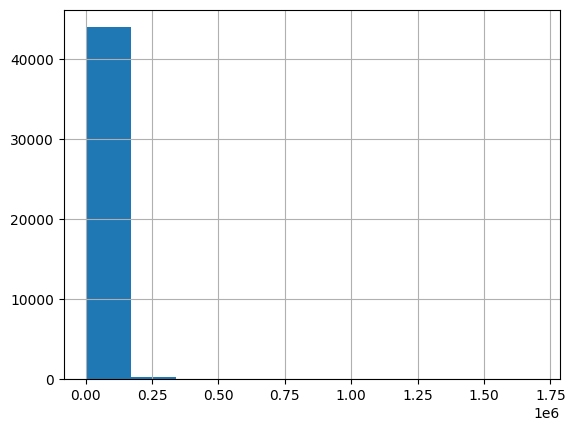

In [59]:
cars_df['price'].hist()

In [60]:
cars_df['price'].skew()

7.819241156784779

In [61]:
cars_df.reset_index(drop=True, inplace=True)
cars_df

,msrp,year,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,stock_type,...,exterior_color_x0,exterior_color_x1,exterior_color_x2,exterior_color_x3,exterior_color_x4,interior_color_x0,interior_color_x1,interior_color_x2,interior_color_x3,interior_color_x4
0,57215.0,2024,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,...,-1.016743,0.079723,0.957974,-0.333534,-0.814538,-0.494265,0.387535,0.589787,0.338319,-0.498702
1,58845.0,2024,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,...,0.451739,1.337975,-0.257526,0.648734,-2.244616,-0.494265,0.387535,0.589787,0.338319,-0.498702
2,58795.0,2024,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,...,0.141299,0.665012,0.884049,-1.457266,-0.907583,0.146235,0.101405,0.135154,0.015257,0.127018
3,27995.0,2024,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,...,1.256852,0.710646,0.237572,0.141691,-1.756619,-0.608476,0.728257,0.914057,-0.787633,0.176680
4,83630.0,2024,83630.0,All-wheel Drive,20.0,Audi,SUV,ev_crossover_midsize,Electric,New,...,0.194003,0.349930,0.440473,-0.011486,-1.480162,-0.609001,0.757246,0.397062,-0.283482,0.090835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44385,36669.0,2024,36669.0,All-wheel Drive,6.0,Subaru,SUV,crossover_compact,Gasoline,New,...,0.492131,0.861728,0.731555,-0.539116,-0.660716,-0.494265,0.387535,0.589787,0.338319,-0.498702
44386,51443.0,2024,47013.0,All-wheel Drive,7.0,Volkswagen,SUV,suv_midsize,Gasoline,New,...,-0.433999,0.108471,1.129237,-0.246424,-0.847668,-1.012676,0.687068,0.476377,-0.351794,0.587591
44387,NaN,2022,49991.0,Four-wheel Drive,17815.0,Jeep,SUV,suv_midsize,Gasoline,Used,...,-0.277456,0.276296,0.920459,-0.063368,-1.298279,-0.355613,0.302936,0.150128,0.110641,-0.217025
44388,57135.0,2024,48135.0,Four-wheel Drive,14.0,RAM,Pickup Truck,truck_fullsize,Gasoline,New,...,-1.560629,0.547981,0.728140,-0.012073,-1.663149,-0.494265,0.387535,0.589787,0.338319,-0.498702


Price has high skew, review methods to remove outliers

#### drivetrain
Close Vocabulary. group them by category

In [62]:
cars_df['drivetrain'].value_counts(dropna=False)

drivetrain
All-wheel Drive                                               21474
Front-wheel Drive                                              8973
Four-wheel Drive                                               8389
Rear-wheel Drive                                               3564
AWD                                                            1101
FWD                                                             343
4WD                                                             209
NaN                                                             206
RWD                                                              75
Unknown                                                          51
4x2                                                               1
Four Wheel Drive                                                  1
All-Wheel Drive with Locking and Limited-Slip Differential        1
All-Wheel Drive                                                   1
Front Wheel Drive                    

In [63]:
def map_drivetrain(drivetrain):
    """
    Group the drive trian by categories

    :param drivetrain: Car drive train

    :return: Grouped drive train
    """
    if pd.isna(drivetrain):
        return np.nan
    
    match drivetrain:
        case 'All-wheel Drive' | 'Four-wheel Drive' | 'AWD' | '4WD' | '4x2' | 'Four Wheel Drive' | 'All-Wheel Drive with Locking and Limited-Slip Differential' | 'All-Wheel Drive':
            return 'All-wheel Drive'
        case 'Rear-wheel Drive' | 'RWD':
            return 'Rear-wheel Drive'
        case 'Front-wheel Drive' | 'FWD' | 'Front Wheel Drive':
            return 'Front-wheel Drive'
        case 'Unknown':
            return np.nan
        case _:
            raise Exception(f"No expected drive train: {drivetrain}")
        

In [64]:
# Applt drive train transformation
cars_df['drivetrain'] = cars_df['drivetrain'].map(map_drivetrain)

In [65]:
cars_df['drivetrain'].value_counts(dropna=False)

drivetrain
All-wheel Drive      31177
Front-wheel Drive     9317
Rear-wheel Drive      3639
NaN                    257
Name: count, dtype: int64

Before apply one hot encoding. Make sure the missing values where properly handled

NOTE: In this version we will remove them because they are few, but other techniques can be applied

In [66]:
# Filter the missing values in 'drivetrain'
cars_df = cars_df.loc[~cars_df['drivetrain'].isna()]
cars_df.reset_index(drop=True, inplace=True)
cars_df.shape

(44133, 72)

Apply One-hot encodding to transform drivetrain

In [67]:
# Initialize the OneHotEncoder drivetrain
drivetrain_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit and transform the data
drivetrain_encoded_data = drivetrain_encoder.fit_transform(cars_df[['drivetrain']])
drivetrain_encoded_data

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [68]:
# Convert the drivetrain encoded data into a DataFrame
drivetrain_encoded_df = pd.DataFrame(drivetrain_encoded_data, columns=drivetrain_encoder.get_feature_names_out(['drivetrain']), index=cars_df.index)
drivetrain_encoded_df

,drivetrain_All-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
44128,1.0,0.0,0.0
44129,1.0,0.0,0.0
44130,1.0,0.0,0.0
44131,1.0,0.0,0.0


In [69]:
# Concatenate the original DataFrame with the drivetrain encoded DataFrame
cars_df = pd.concat([cars_df, drivetrain_encoded_df], axis=1)
cars_df

,msrp,year,price,drivetrain,mileage,make,bodystyle,cat,fuel_type,stock_type,...,exterior_color_x3,exterior_color_x4,interior_color_x0,interior_color_x1,interior_color_x2,interior_color_x3,interior_color_x4,drivetrain_All-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,57215.0,2024,54595.0,All-wheel Drive,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,...,-0.333534,-0.814538,-0.494265,0.387535,0.589787,0.338319,-0.498702,1.0,0.0,0.0
1,58845.0,2024,52446.0,Front-wheel Drive,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,...,0.648734,-2.244616,-0.494265,0.387535,0.589787,0.338319,-0.498702,0.0,1.0,0.0
2,58795.0,2024,54295.0,Rear-wheel Drive,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,...,-1.457266,-0.907583,0.146235,0.101405,0.135154,0.015257,0.127018,0.0,0.0,1.0
3,27995.0,2024,24803.0,Front-wheel Drive,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,...,0.141691,-1.756619,-0.608476,0.728257,0.914057,-0.787633,0.176680,0.0,1.0,0.0
4,83630.0,2024,83630.0,All-wheel Drive,20.0,Audi,SUV,ev_crossover_midsize,Electric,New,...,-0.011486,-1.480162,-0.609001,0.757246,0.397062,-0.283482,0.090835,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44128,36669.0,2024,36669.0,All-wheel Drive,6.0,Subaru,SUV,crossover_compact,Gasoline,New,...,-0.539116,-0.660716,-0.494265,0.387535,0.589787,0.338319,-0.498702,1.0,0.0,0.0
44129,51443.0,2024,47013.0,All-wheel Drive,7.0,Volkswagen,SUV,suv_midsize,Gasoline,New,...,-0.246424,-0.847668,-1.012676,0.687068,0.476377,-0.351794,0.587591,1.0,0.0,0.0
44130,NaN,2022,49991.0,All-wheel Drive,17815.0,Jeep,SUV,suv_midsize,Gasoline,Used,...,-0.063368,-1.298279,-0.355613,0.302936,0.150128,0.110641,-0.217025,1.0,0.0,0.0
44131,57135.0,2024,48135.0,All-wheel Drive,14.0,RAM,Pickup Truck,truck_fullsize,Gasoline,New,...,-0.012073,-1.663149,-0.494265,0.387535,0.589787,0.338319,-0.498702,1.0,0.0,0.0


In [70]:
# Once used drop the interior_color feature
cars_df.drop(columns='drivetrain', inplace=True)
cars_df.shape

(44133, 74)

#### mileage
No transformation needed

<Axes: >

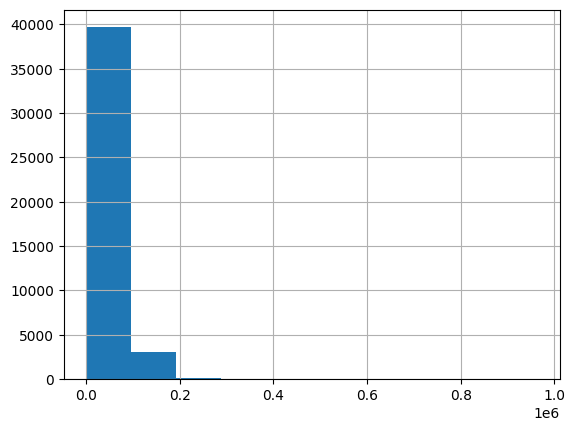

In [71]:
cars_df['mileage'].hist()

In [72]:
cars_df['mileage'].min()

0.0

In [73]:
cars_df['mileage'].max()

962839.0

There are some outliers, feature has a high skew

#### make
Make feature has a semi-close vocabulary. We can use a pretrained model like Word2Vec or One-Hot encoding, this last one can generate the Curse Dimensinality and sparcity.

In [74]:
len(cars_df['make'].unique())

59

In [75]:
cars_df['make'].value_counts(dropna=False)

make
Chevrolet        4097
Ford             4075
Jeep             2988
Mercedes-Benz    2788
Nissan           2612
Hyundai          2592
Volkswagen       2360
BMW              2260
Subaru           1740
Toyota           1595
Honda            1581
Audi             1444
Mazda            1319
Cadillac         1293
Kia              1291
Dodge            1143
Lexus             980
RAM               972
GMC               956
Acura             876
Lincoln           730
INFINITI          603
Buick             496
Land Rover        470
Volvo             406
Porsche           355
Chrysler          292
Tesla             278
Alfa Romeo        229
Jaguar            194
Genesis           140
Mitsubishi        130
Maserati          130
Ferrari            96
MINI               93
Bentley            82
Rolls-Royce        74
Rivian             50
Pontiac            49
Scion              42
Aston Martin       39
Lamborghini        35
FIAT               30
Hummer             25
McLaren            21
Mercu

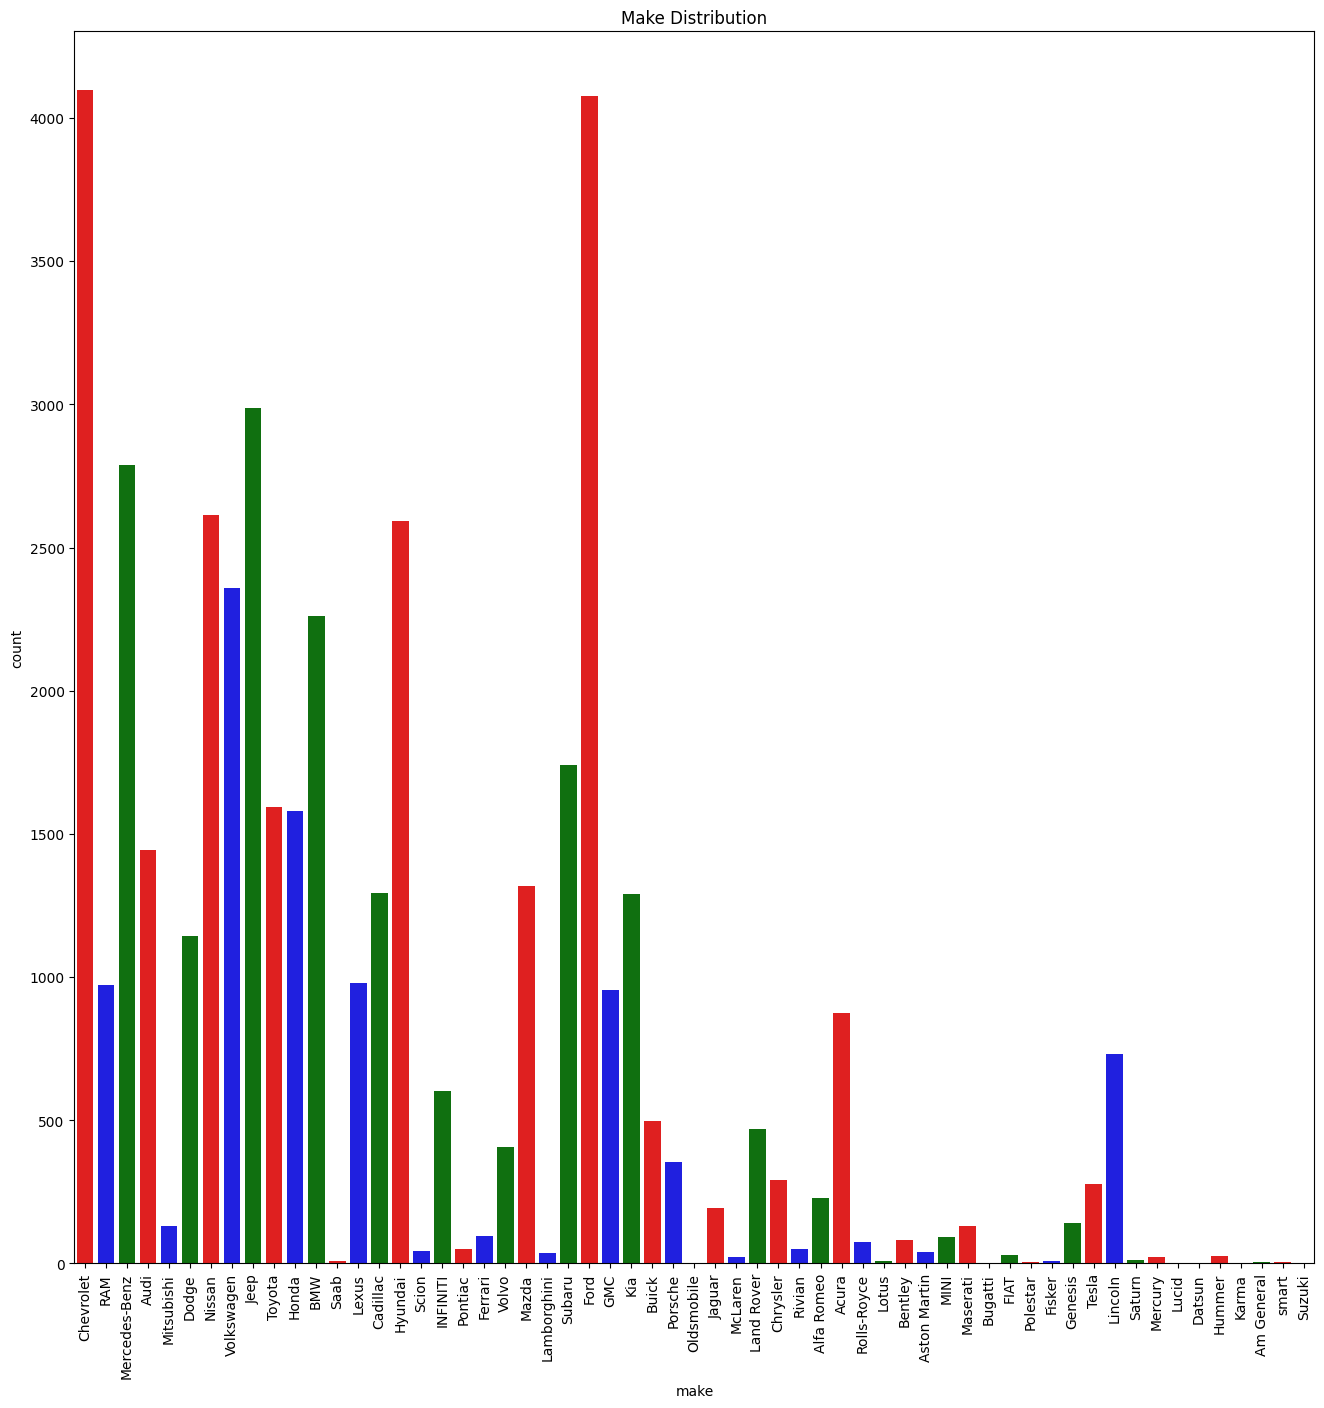

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the figure size
plt.figure(figsize=(16, 16))
ax = sns.countplot(x='make', data=cars_df, palette=['red', 'blue', 'green'])
plt.title('Make Distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.show()

Apply One-Hot encoding. To reduce the unbalanced factor, remove the instances where the categories frecuency is under a defined threshold until they have enough data to participate in the model. 

The threshold value is added also to avoid remove a category when outlier removal is applied

NOTE: use regularization methods (L1, L2) to train the model, and regression algorithms able to handle unbalanced features like tress-desitions based models. Additionally if needed set the model categories weights to focus on the cases with lower frecuency.

In [77]:
# Define the threshold for category frequency
make_fecuency_threshold = 300
# Compute the frequency of each category
make_category_counts = cars_df['make'].value_counts()
# Identify categories that exceed the threshold
make_categories_to_remove = make_category_counts[make_category_counts > make_fecuency_threshold].index
# Filter the DataFrame to exclude rows with these categories
cars_df = cars_df[cars_df['make'].isin(make_categories_to_remove)]
make_categories_to_remove # NOTE: Add a filter in the inference model to skip invalid cars make

Index(['Chevrolet', 'Ford', 'Jeep', 'Mercedes-Benz', 'Nissan', 'Hyundai',
       'Volkswagen', 'BMW', 'Subaru', 'Toyota', 'Honda', 'Audi', 'Mazda',
       'Cadillac', 'Kia', 'Dodge', 'Lexus', 'RAM', 'GMC', 'Acura', 'Lincoln',
       'INFINITI', 'Buick', 'Land Rover', 'Volvo', 'Porsche'],
      dtype='object', name='make')

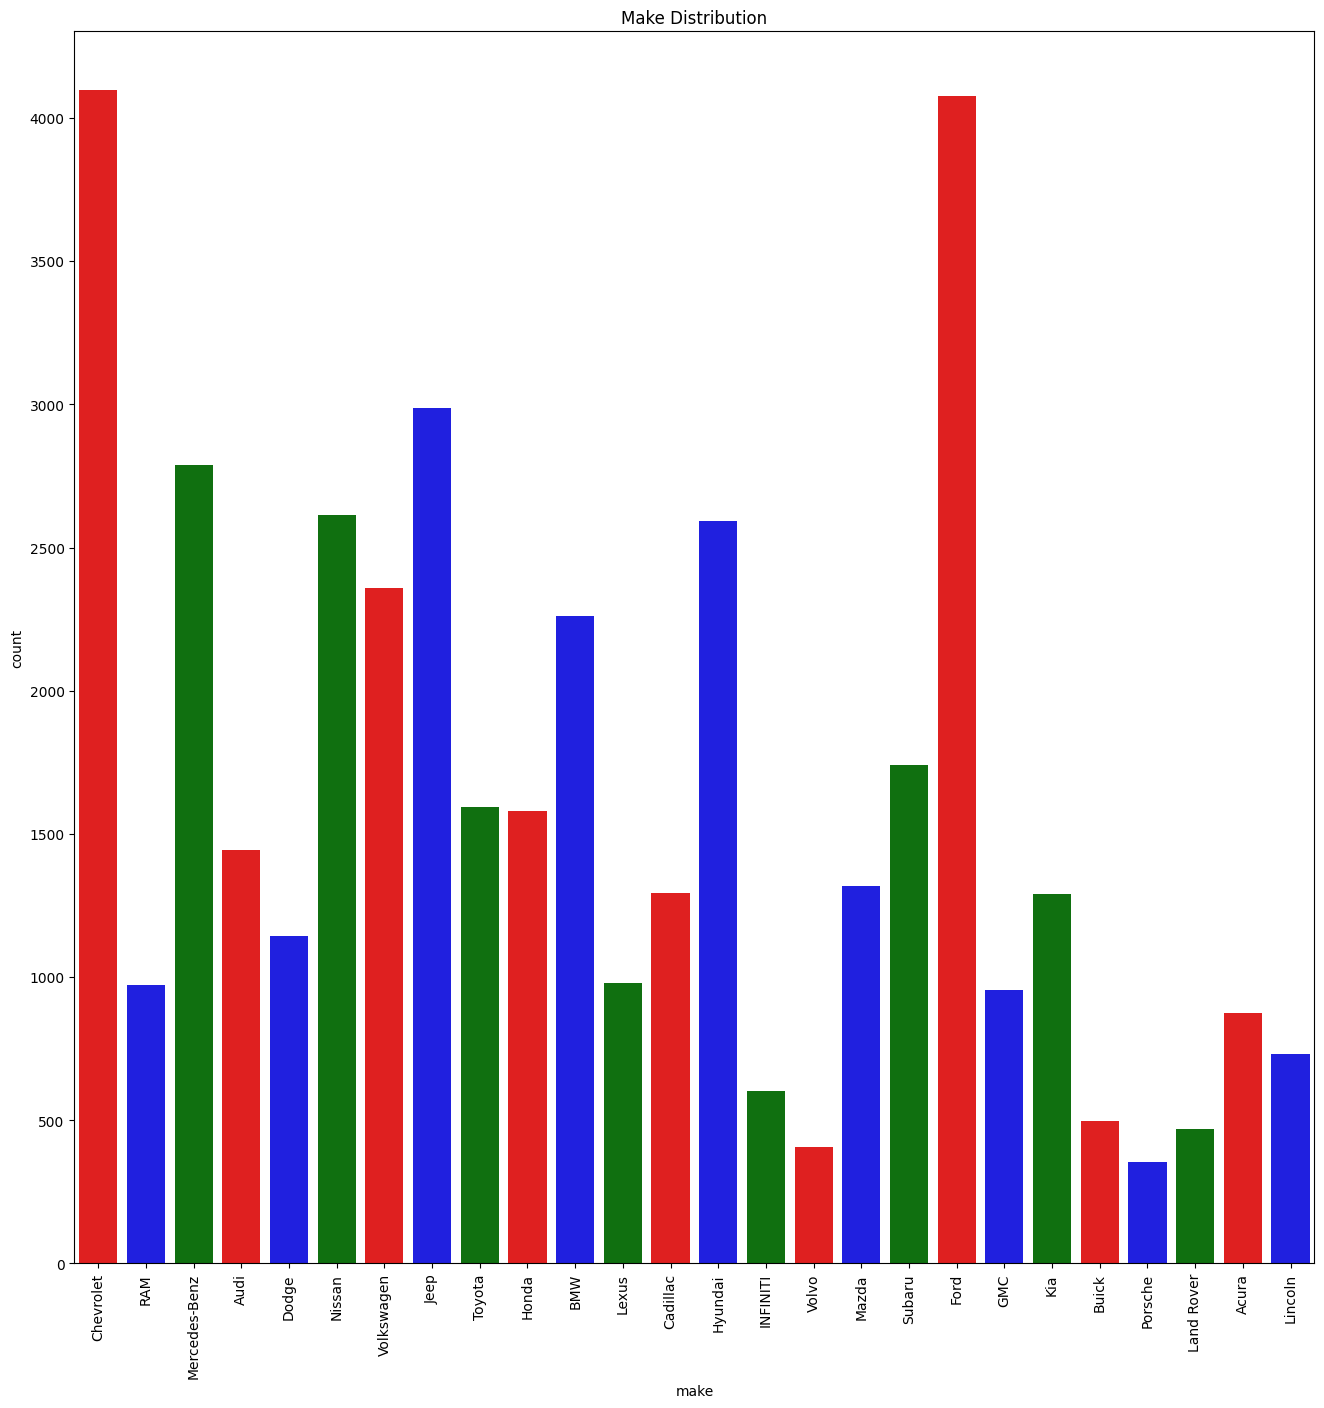

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the figure size
plt.figure(figsize=(16, 16))
ax = sns.countplot(x='make', data=cars_df, palette=['red', 'blue', 'green'])
plt.title('Make Distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.show()

In [79]:
# Initialize the OneHotEncoder maker
make_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit and transform the data
make_encoded_data = make_encoder.fit_transform(cars_df[['make']])

In [80]:
# Convert the drivetrain encoded data into a DataFrame
make_encoded_df = pd.DataFrame(make_encoded_data, columns=make_encoder.get_feature_names_out(['make']), index=cars_df.index)
make_encoded_df

,make_Acura,make_Audi,make_BMW,make_Buick,make_Cadillac,make_Chevrolet,make_Dodge,make_Ford,make_GMC,make_Honda,...,make_Lincoln,make_Mazda,make_Mercedes-Benz,make_Nissan,make_Porsche,make_RAM,make_Subaru,make_Toyota,make_Volkswagen,make_Volvo
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [81]:
# Concatenate the original DataFrame with the drivetrain encoded DataFrame
cars_df = pd.concat([cars_df, make_encoded_df], axis=1)
cars_df

,msrp,year,price,mileage,make,bodystyle,cat,fuel_type,stock_type,model_hashed_0,...,make_Lincoln,make_Mazda,make_Mercedes-Benz,make_Nissan,make_Porsche,make_RAM,make_Subaru,make_Toyota,make_Volkswagen,make_Volvo
0,57215.0,2024,54595.0,0.0,Chevrolet,SUV,ev_crossover_midsize,Electric,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58845.0,2024,52446.0,0.0,RAM,Cargo Van,van_fullsize,Gasoline,New,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,58795.0,2024,54295.0,8.0,Mercedes-Benz,Cargo Van,van_fullsize,Diesel,New,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27995.0,2024,24803.0,0.0,Chevrolet,SUV,crossover_midsize,Gasoline,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,83630.0,2024,83630.0,20.0,Audi,SUV,ev_crossover_midsize,Electric,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44128,36669.0,2024,36669.0,6.0,Subaru,SUV,crossover_compact,Gasoline,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44129,51443.0,2024,47013.0,7.0,Volkswagen,SUV,suv_midsize,Gasoline,New,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44130,NaN,2022,49991.0,17815.0,Jeep,SUV,suv_midsize,Gasoline,Used,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44131,57135.0,2024,48135.0,14.0,RAM,Pickup Truck,truck_fullsize,Gasoline,New,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [82]:
# Once used drop the make feature
cars_df.drop(columns='make', inplace=True)
cars_df.shape

(42022, 99)

#### bodystyle
It seems a close vocabulaty (low cardinality). It's possible to apply one-hot encoding.

In [83]:
cars_df['bodystyle'].value_counts(dropna=False)

bodystyle
SUV              26131
Sedan             7070
Pickup Truck      3692
Coupe             1247
Hatchback         1226
Cargo Van         1134
Convertible        730
Passenger Van      317
Wagon              279
NaN                149
Minivan             47
Name: count, dtype: int64

NOTE: There are some features values with unbalanced. Check it in depth in the meeting

And how should handle the inputation in Categorical features with mising values? 

Apply one-hot encodding

In [84]:
# Initialize the OneHotEncoder bodystyle
bodystyle_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit and transform the data
bodystyle_encoded_data = bodystyle_encoder.fit_transform(cars_df[['bodystyle']])

In [85]:
# Convert the drivetrain encoded data into a DataFrame
bodystyle_encoded_df = pd.DataFrame(bodystyle_encoded_data, columns=bodystyle_encoder.get_feature_names_out(['bodystyle']), index=cars_df.index)
bodystyle_encoded_df

,bodystyle_Cargo Van,bodystyle_Convertible,bodystyle_Coupe,bodystyle_Hatchback,bodystyle_Minivan,bodystyle_Passenger Van,bodystyle_Pickup Truck,bodystyle_SUV,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
44128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44131,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [86]:
# Concatenate the original DataFrame with the drivetrain encoded DataFrame
cars_df = pd.concat([cars_df, bodystyle_encoded_df], axis=1)
cars_df

,msrp,year,price,mileage,bodystyle,cat,fuel_type,stock_type,model_hashed_0,model_hashed_1,...,bodystyle_Convertible,bodystyle_Coupe,bodystyle_Hatchback,bodystyle_Minivan,bodystyle_Passenger Van,bodystyle_Pickup Truck,bodystyle_SUV,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan
0,57215.0,2024,54595.0,0.0,SUV,ev_crossover_midsize,Electric,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,58845.0,2024,52446.0,0.0,Cargo Van,van_fullsize,Gasoline,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58795.0,2024,54295.0,8.0,Cargo Van,van_fullsize,Diesel,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27995.0,2024,24803.0,0.0,SUV,crossover_midsize,Gasoline,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,83630.0,2024,83630.0,20.0,SUV,ev_crossover_midsize,Electric,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44128,36669.0,2024,36669.0,6.0,SUV,crossover_compact,Gasoline,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44129,51443.0,2024,47013.0,7.0,SUV,suv_midsize,Gasoline,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44130,NaN,2022,49991.0,17815.0,SUV,suv_midsize,Gasoline,Used,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44131,57135.0,2024,48135.0,14.0,Pickup Truck,truck_fullsize,Gasoline,New,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [87]:
# Once used drop the interior_color feature
cars_df.drop(columns='bodystyle', inplace=True)
cars_df.shape

(42022, 109)

#### cat
We can apply TF-IDF to cluster them in categories after split the text by '_'

In [88]:
cars_df['cat'].value_counts(dropna=False)

cat
crossover_compact               8382
luxurysuv_crossover             5555
crossover_midsize               4151
suv_midsize                     3357
truck_fullsize                  2614
sedan_compact                   2205
luxurypassenger_standard        1967
sedan_midsize                   1739
hybrid_suv                      1385
luxurypassenger_plus            1355
van_fullsize                    1333
suv_fullsize                    1034
luxurysuv_suv                   1000
truck_compact                    992
coupeconvertible_coupe           680
coupeconvertible_coupesport      467
hybrid_passenger                 452
ev_luxurysuv_suv                 423
ev_luxurypassenger_standard      378
ev_suv_midsize                   369
wagonhatchback_hatchback         364
van_mini                         289
coupeconvertible_convertible     282
NaN                              232
ev_crossover_midsize             194
ev_crossover_compact             184
wagonhatchback_wagon             1

In [89]:
cars_df['cat'].unique()

array(['ev_crossover_midsize', 'van_fullsize', 'crossover_midsize',
       'hybrid_suv', 'crossover_compact', 'suv_midsize',
       'coupeconvertible_convertible', 'suv_fullsize', 'sedan_compact',
       'hybrid_passenger', 'luxurypassenger_plus', 'luxurysuv_crossover',
       'sedan_midsize', 'wagonhatchback_hatchback',
       'ev_wagonhatchback_hatchback', 'luxurysuv_suv',
       'luxurypassenger_standard', 'coupeconvertible_coupesport',
       'coupeconvertible_coupe', nan, 'wagonhatchback_wagon',
       'truck_fullsize', 'ev_luxurysuv_suv', 'van_mini',
       'ev_suv_fullsize', 'ev_suv_midsize', 'ev_luxurypassenger_standard',
       'luxurypassenger_ultra', 'sportscar_standard', 'truck_compact',
       'sedan_fullsize', 'ev_sedan_compact', 'ev_wagonhatchback_wagon',
       'ev_luxurypassenger_plus', 'ev_crossover_compact',
       'ev_sedan_midsize', 'ev_truck_fullsize', 'ev_van_fullsize'],
      dtype=object)

Apply Word2Vector embedding trnasformation

In [90]:
def clean_cat(cat):
    # Check if value is empty
    if pd.isna(cat):
        return 'unknown'
    # Convert cat to lower case
    cat = cat.lower()
    # Split by '_' and join again by ' '
    cat = ' '.join(cat.split('_'))
    # Remove double spaces
    cat = re.sub(r'\s+', ' ', cat)
    # Return formated text
    return cat

In [91]:
# Apply lower case and remove special characters
cars_df['cat'] = cars_df['cat'].apply(clean_cat)

In [92]:
cars_df['cat'].value_counts(dropna=False)

cat
crossover compact               8382
luxurysuv crossover             5555
crossover midsize               4151
suv midsize                     3357
truck fullsize                  2614
sedan compact                   2205
luxurypassenger standard        1967
sedan midsize                   1739
hybrid suv                      1385
luxurypassenger plus            1355
van fullsize                    1333
suv fullsize                    1034
luxurysuv suv                   1000
truck compact                    992
coupeconvertible coupe           680
coupeconvertible coupesport      467
hybrid passenger                 452
ev luxurysuv suv                 423
ev luxurypassenger standard      378
ev suv midsize                   369
wagonhatchback hatchback         364
van mini                         289
coupeconvertible convertible     282
unknown                          232
ev crossover midsize             194
ev crossover compact             184
wagonhatchback wagon             1

In [93]:
# Tokenize colors sentences
tokenized_cat = [simple_preprocess(sentence) for sentence in cars_df['cat'].tolist()]

In [94]:
# Train the Word2Vec model
cat_vector_size = 3 # This is a hyperparameter. #D to keep it user friendly
cat_model = Word2Vec(sentences=tokenized_cat, vector_size=cat_vector_size, window=5, min_count=1, workers=4)

In [95]:
# Calculate the vectors feature avegare
def get_cat_phrase_vector(cat_phrase, model):
    cat_words = cat_phrase.split()
    cat_word_vectors = [model.wv[word] for word in cat_words if word in model.wv]
    if not cat_word_vectors:
        print(f"No words found in model for phrase: {cat_phrase}")
        return np.nan
    return sum(cat_word_vectors) / len(cat_word_vectors)


In [96]:
# Calculate the vertor for each cat
cat_vectors_s = cars_df['cat'].apply(lambda ic: get_cat_phrase_vector(ic, cat_model))
cat_vectors_s

0        [-0.049846727, -0.2997799, 0.84617084]
1             [0.7367572, -0.8875586, 1.096331]
2             [0.7367572, -0.8875586, 1.096331]
3         [-0.012299478, -0.2321885, 0.8892745]
4        [-0.049846727, -0.2997799, 0.84617084]
                          ...                  
44128      [0.12328106, -0.3816051, 0.74373335]
44129       [0.4012174, -0.23761514, 0.7503739]
44130       [0.4012174, -0.23761514, 0.7503739]
44131      [0.22245978, -0.6134709, 0.91816306]
44132     [-0.33562684, -0.26118255, 1.2656779]
Name: cat, Length: 42022, dtype: object

In [97]:
# Replace the nan values with an array of (0,0,0)
base_invalid_value = [0]*cat_vector_size
cat_vectors_s = cat_vectors_s.apply(lambda x: x if isinstance(x, np.ndarray) else base_invalid_value)

In [98]:
# Generate the interior color df using the transformed feature vectors
cat_df = pd.DataFrame(cat_vectors_s.values.tolist(), columns=[f'cat_x{i}' for i in range(len(cat_vectors_s[0]))], index=cars_df.index)
cat_df

,cat_x0,cat_x1,cat_x2
0,-0.049847,-0.299780,0.846171
1,0.736757,-0.887559,1.096331
2,0.736757,-0.887559,1.096331
3,-0.012299,-0.232188,0.889274
4,-0.049847,-0.299780,0.846171
...,...,...,...
44128,0.123281,-0.381605,0.743733
44129,0.401217,-0.237615,0.750374
44130,0.401217,-0.237615,0.750374
44131,0.222460,-0.613471,0.918163


In [99]:
# Concatenate the dataframes
cars_df = pd.concat([cars_df, cat_df], axis=1)
cars_df

,msrp,year,price,mileage,cat,fuel_type,stock_type,model_hashed_0,model_hashed_1,model_hashed_2,...,bodystyle_Minivan,bodystyle_Passenger Van,bodystyle_Pickup Truck,bodystyle_SUV,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan,cat_x0,cat_x1,cat_x2
0,57215.0,2024,54595.0,0.0,ev crossover midsize,Electric,New,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.049847,-0.299780,0.846171
1,58845.0,2024,52446.0,0.0,van fullsize,Gasoline,New,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.736757,-0.887559,1.096331
2,58795.0,2024,54295.0,8.0,van fullsize,Diesel,New,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.736757,-0.887559,1.096331
3,27995.0,2024,24803.0,0.0,crossover midsize,Gasoline,New,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.012299,-0.232188,0.889274
4,83630.0,2024,83630.0,20.0,ev crossover midsize,Electric,New,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.049847,-0.299780,0.846171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44128,36669.0,2024,36669.0,6.0,crossover compact,Gasoline,New,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.123281,-0.381605,0.743733
44129,51443.0,2024,47013.0,7.0,suv midsize,Gasoline,New,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.401217,-0.237615,0.750374
44130,NaN,2022,49991.0,17815.0,suv midsize,Gasoline,Used,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.401217,-0.237615,0.750374
44131,57135.0,2024,48135.0,14.0,truck fullsize,Gasoline,New,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.222460,-0.613471,0.918163


In [100]:
import matplotlib.pyplot as plt

x = cars_df['cat_x0'].values.tolist()
y = cars_df['cat_x1'].values.tolist()
z = cars_df['cat_x2'].values.tolist()
# Labels for each point
labels = cars_df['cat'].values.tolist()

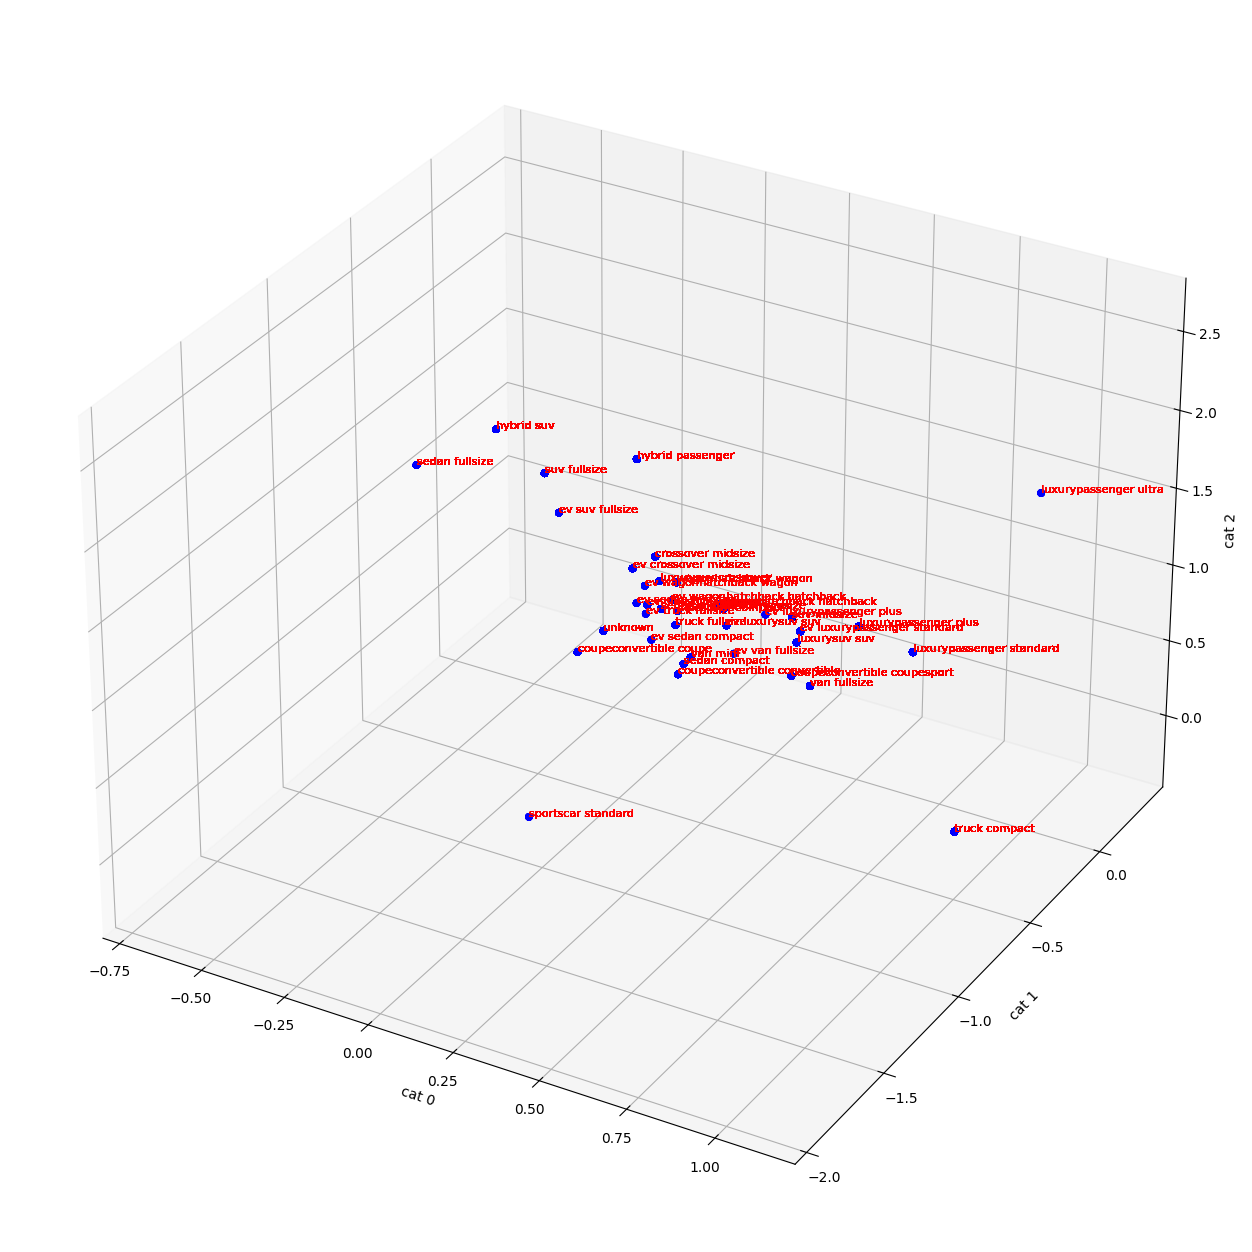

In [101]:
# Create a new figure
fig = plt.figure(figsize=(16, 16))

# Add an axes
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, color='b', marker='o')  # You can change the color and marker style

# Label each point
for i, txt in enumerate(labels):
    ax.text(x[i], y[i], z[i], txt, color='red', fontsize=8)  # You can change text color and properties

# Adding labels to the axes
ax.set_xlabel('cat 0')
ax.set_ylabel('cat 1')
ax.set_zlabel('cat 2')

# Show plot
plt.show()

In [102]:
# Remove cat column
cars_df.drop(columns='cat', inplace=True)
cars_df.shape

(42022, 111)

#### fuel_type
It seems like a close category, Nominal. Group them by category

In [103]:
cars_df['fuel_type'].value_counts(dropna=False)

fuel_type
Gasoline                         36724
Electric                          1840
Hybrid                            1804
Diesel                             859
E85 Flex Fuel                      507
NaN                                237
Flexible Fuel                       12
Gasoline Fuel                       12
Plug-In Hybrid                      10
Bio Diesel                           5
Regular Unleaded                     4
Premium Unleaded                     3
Natural Gas                          2
Gas/Electric Hyb                     1
Hybrid Fuel                          1
Gasoline/Mild Electric Hybrid        1
Name: count, dtype: int64

In [104]:
def map_fuel_type(fuel_type):
    """
    Group by fuel types

    :param fuel_type: Car fuel type

    :return Fuel type category
    """
    if pd.isna(fuel_type):
        return np.nan

    match fuel_type:
        case 'Gasoline' | 'Gasoline Fuel' | 'Diesel' | 'Premium Unleaded' | 'Regular Unleaded' | 'Premium Unleaded':
            return 'Gasoline'
        case 'Electric' | 'Electric with Ga':
            return 'Electric'
        case 'Hybrid' | 'Plug-In Hybrid' | 'Plug-in Gas/Elec' | 'Gas/Electric Hyb' | 'Hybrid Fuel' | 'Bio Diesel' | 'Gasoline/Mild Electric Hybrid' | 'Natural Gas':
            return 'Hybrid'
        case 'Flexible Fuel' | 'E85 Flex Fuel'  | 'Flexible':
            return 'Flexible'
        case _:
            raise Exception(f"No expected drive train: {fuel_type}")
        

In [105]:
# Apply fuel type transformation
cars_df['fuel_type'] = cars_df['fuel_type'].map(map_fuel_type)

In [106]:
cars_df['fuel_type'].value_counts(dropna=False)

fuel_type
Gasoline    37602
Electric     1840
Hybrid       1824
Flexible      519
NaN           237
Name: count, dtype: int64

Apply one hot encoding. Remove the NaN values

In [107]:
cars_df = cars_df[~cars_df['fuel_type'].isna()]
cars_df.shape

(41785, 111)

In [108]:
# Initialize the OneHotEncoder drivetrain
fuel_type_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Fit and transform the data
fuel_type_encoded_data = fuel_type_encoder.fit_transform(cars_df[['fuel_type']])


In [109]:
# Convert the drivetrain encoded data into a DataFrame
fuel_type_encoded_df = pd.DataFrame(fuel_type_encoded_data, columns=fuel_type_encoder.get_feature_names_out(['fuel_type']), index=cars_df.index)
fuel_type_encoded_df

,fuel_type_Electric,fuel_type_Flexible,fuel_type_Gasoline,fuel_type_Hybrid
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
44128,0.0,0.0,1.0,0.0
44129,0.0,0.0,1.0,0.0
44130,0.0,0.0,1.0,0.0
44131,0.0,0.0,1.0,0.0


In [110]:
# Concatenate the original DataFrame with the drivetrain encoded DataFrame
cars_df = pd.concat([cars_df, fuel_type_encoded_df], axis=1)
cars_df

,msrp,year,price,mileage,fuel_type,stock_type,model_hashed_0,model_hashed_1,model_hashed_2,model_hashed_3,...,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan,cat_x0,cat_x1,cat_x2,fuel_type_Electric,fuel_type_Flexible,fuel_type_Gasoline,fuel_type_Hybrid
0,57215.0,2024,54595.0,0.0,Electric,New,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.049847,-0.299780,0.846171,1.0,0.0,0.0,0.0
1,58845.0,2024,52446.0,0.0,Gasoline,New,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.736757,-0.887559,1.096331,0.0,0.0,1.0,0.0
2,58795.0,2024,54295.0,8.0,Gasoline,New,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.736757,-0.887559,1.096331,0.0,0.0,1.0,0.0
3,27995.0,2024,24803.0,0.0,Gasoline,New,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.012299,-0.232188,0.889274,0.0,0.0,1.0,0.0
4,83630.0,2024,83630.0,20.0,Electric,New,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.049847,-0.299780,0.846171,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44128,36669.0,2024,36669.0,6.0,Gasoline,New,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.123281,-0.381605,0.743733,0.0,0.0,1.0,0.0
44129,51443.0,2024,47013.0,7.0,Gasoline,New,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.401217,-0.237615,0.750374,0.0,0.0,1.0,0.0
44130,NaN,2022,49991.0,17815.0,Gasoline,Used,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.401217,-0.237615,0.750374,0.0,0.0,1.0,0.0
44131,57135.0,2024,48135.0,14.0,Gasoline,New,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.222460,-0.613471,0.918163,0.0,0.0,1.0,0.0


In [111]:
# Once used drop the interior_color feature
cars_df.drop(columns='fuel_type', inplace=True)
cars_df.shape

(41785, 114)

#### stock_type
Not Transformation Needed

In [112]:
def map_stock_type(stock_type):
    """
    Map stock_type

    :param stock_type: stock type New/Used

    :return Binary stock_type 
    """
    if pd.isna(stock_type):
        return np.nan

    match stock_type:
        case 'New':
            return True
        case 'Used':
            return False
        case _:
            raise Exception(f"No expected stock type: {stock_type}")
        

In [113]:
# Apply binary transformation
cars_df['stock_type'] = cars_df['stock_type'].map(map_stock_type)

In [114]:
cars_df['stock_type'].value_counts()

stock_type
True     22424
False    19361
Name: count, dtype: int64

In [115]:
cars_df

,msrp,year,price,mileage,stock_type,model_hashed_0,model_hashed_1,model_hashed_2,model_hashed_3,model_hashed_4,...,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan,cat_x0,cat_x1,cat_x2,fuel_type_Electric,fuel_type_Flexible,fuel_type_Gasoline,fuel_type_Hybrid
0,57215.0,2024,54595.0,0.0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.049847,-0.299780,0.846171,1.0,0.0,0.0,0.0
1,58845.0,2024,52446.0,0.0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.736757,-0.887559,1.096331,0.0,0.0,1.0,0.0
2,58795.0,2024,54295.0,8.0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.736757,-0.887559,1.096331,0.0,0.0,1.0,0.0
3,27995.0,2024,24803.0,0.0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.012299,-0.232188,0.889274,0.0,0.0,1.0,0.0
4,83630.0,2024,83630.0,20.0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.049847,-0.299780,0.846171,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44128,36669.0,2024,36669.0,6.0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.123281,-0.381605,0.743733,0.0,0.0,1.0,0.0
44129,51443.0,2024,47013.0,7.0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.401217,-0.237615,0.750374,0.0,0.0,1.0,0.0
44130,NaN,2022,49991.0,17815.0,False,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.401217,-0.237615,0.750374,0.0,0.0,1.0,0.0
44131,57135.0,2024,48135.0,14.0,True,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.222460,-0.613471,0.918163,0.0,0.0,1.0,0.0


#### Export Results 
Export the results

In [116]:
preprocess_filpath = '../data/data_exploration/output/cars_after_transform.csv'
cars_df.to_csv(preprocess_filpath, index=False)

### Data imputation
Imputate the data to populate missing values.

The extrategy to follow is use iterative imputation, but other impuration methods could be applied, it depends on the problem to solve 
* The column mean value. 
* The column median value.
* The column mode value.
* A constant value.
* KNN Imputation (Sensitive to outliers and different features scale).
* Iterative Imputation (in our case using the RandomForestRegressor estimator to handle outliers and different features scales).

In [117]:
# Iterative imputation must not use the target, remove it
cars_price = cars_df['price']
cars_df.drop(columns='price', inplace=True)

In [118]:
import joblib

# train/use Imputer
train_inputer = False

imputer_model_filepath = r'../data/data_exploration/output/preprocess_regression_imputer_model.pkl'
if train_inputer:
    # Train imputer
    imp = IterativeImputer(estimator=RandomForestRegressor(), verbose=1) 
    # fit on the dataset 
    imp.fit(cars_df) 
    # Save imnputer model
    joblib.dump(imp, imputer_model_filepath)

# Load your model
imp: IterativeImputer = joblib.load(imputer_model_filepath)
    
# Apply imputation
df_trans = imp.transform(cars_df)
# transform the dataset 
cars_df = pd.DataFrame(df_trans, columns=cars_df.columns, index=cars_df.index)
cars_df

[IterativeImputer] Completing matrix with shape (41785, 113)


,msrp,year,mileage,stock_type,model_hashed_0,model_hashed_1,model_hashed_2,model_hashed_3,model_hashed_4,model_hashed_5,...,bodystyle_Sedan,bodystyle_Wagon,bodystyle_nan,cat_x0,cat_x1,cat_x2,fuel_type_Electric,fuel_type_Flexible,fuel_type_Gasoline,fuel_type_Hybrid
0,57215.00,2024.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.049847,-0.299780,0.846171,1.0,0.0,0.0,0.0
1,58845.00,2024.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.736757,-0.887559,1.096331,0.0,0.0,1.0,0.0
2,58795.00,2024.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.736757,-0.887559,1.096331,0.0,0.0,1.0,0.0
3,27995.00,2024.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.012299,-0.232188,0.889274,0.0,0.0,1.0,0.0
4,83630.00,2024.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.049847,-0.299780,0.846171,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44128,36669.00,2024.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.123281,-0.381605,0.743733,0.0,0.0,1.0,0.0
44129,51443.00,2024.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.401217,-0.237615,0.750374,0.0,0.0,1.0,0.0
44130,50007.31,2022.0,17815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.401217,-0.237615,0.750374,0.0,0.0,1.0,0.0
44131,57135.00,2024.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.222460,-0.613471,0.918163,0.0,0.0,1.0,0.0


### Outliers Removal
Remove outliers to improve the data quality, the outliers are different of anomalies, keep this in mind.

Isolation Forest is used to remove the global outliers. Other outliers removal techniques are:
* Standard Derivation Method.
* Interquantile Range Method.
* Local Outlier Factor (local outlier removal).
* Isolation Forest.
* Others.

In [119]:
isolation_forest_contamination = 0.1
iso_forest = IsolationForest(n_estimators=200, contamination=isolation_forest_contamination, random_state=42, verbose=1)
# Fit the model
iso_forest.fit(cars_df)
# Remove outliers 
cars_df['outlier'] = iso_forest.predict(cars_df)
# Remove global outliers
cars_df = cars_df[cars_df['outlier'] != -1]
# Remove the outlier column
cars_df.drop(columns='outlier', inplace=True)

C:\Users\cesar_0qb0xal\AppData\Local\Temp\ipykernel_12896\4286056245.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_df.drop(columns='outlier', inplace=True)


### Feature Selection
Not needed in this case

### Scale Data
Not needed for now. Using Neural Networks we need to apply it (or any other ML algorithm with scale sensitivity)

### Dimensionality reduction
Not needed in this case

### Export Resutls
Not needed in this case

In [120]:
cars_filepath = "../data/preprocess/cars_prepared.csv"
cars_df.to_csv(cars_filepath, index=False)